In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline, BSpline

In [2]:
#-- Change Default Plot size --#
# Reference: https://stackabuse.com/python-data-visualization-with-matplotlib/
# print(plt.rcParams.get('figure.figsize'))
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

In [3]:
#print(plt.rcParams.get('figure.figsize'))

# Limit and Discovery Potential Plot 

 The following code calculates the possible mixing angles ($sin^2 \theta$) for and current exclusion limits on the benchmarks presented in Figure 8 of [1] as a function of $M_S$.
 
[1] arXiv: 1911.01432 (https://arxiv.org/abs/1911.01432)

## Load and Plot Constraint files

Constraints were obtained from from Figure 5 of [2]. The data was extracted via plot digitizaiton using [3].

[2] arXiv:1711.05722 (https://arxiv.org/abs/1711.05722)
[3] https://automeris.io/WebPlotDigitizer/

In [4]:
#-- Quick function to convert human RGBA to python RGBA tuple format --#
def RGBAtoRGBAtuple(color):
    r = color[0]/255
    g = color[1]/255
    b = color[2]/255
    a = color[3]
    return (r, g, b, a)

In [5]:
#-- Load constraint files --#
LEPConstraint = pd.read_csv('Constraints/LEPConstraint.csv')
OPALConstraint = pd.read_csv('Constraints/OPALConstraint.csv')

LEPConst = LEPConstraint.values[LEPConstraint.values[:,0].argsort()]
OPALConst = OPALConstraint.values[OPALConstraint.values[:,0].argsort()]

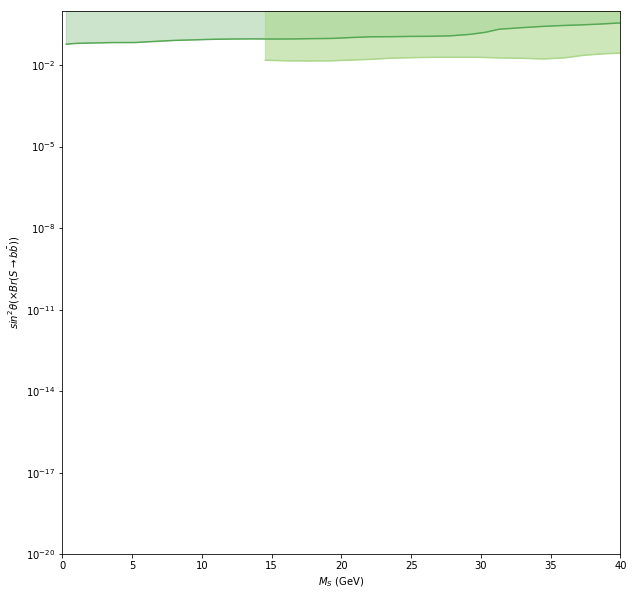

In [6]:
#-- Plot constraints --#
plt.plot(OPALConst[:,0], OPALConst[:,1], color=RGBAtoRGBAtuple((85,168,84,1)))    #'#') #55A854
plt.fill_between(OPALConst[:,0], OPALConst[:,1], y2=1,color=RGBAtoRGBAtuple((85,168,84,0.3))) 

plt.plot(LEPConst[:,0], LEPConst[:,1],color=RGBAtoRGBAtuple((172,215,140,1)))
plt.fill_between(LEPConst[:,0], LEPConst[:,1], y2=1, color=RGBAtoRGBAtuple((172,215,140,0.6)))

plt.xlabel(r'$M_S$ (GeV)')
plt.ylabel(r'$sin^2 \theta (\times Br (S \rightarrow b \bar{b}))$')
plt.yscale('log')
plt.ylim(1e-20, 1)
plt.xlim(0,40)
plt.show()

## Load and Plot Future Discovery Potentials

In [7]:
HFactoryZ3Constraint = pd.read_csv('DiscoveryPotential/HFactory_Z3.csv')
HFactoryZ5Constraint = pd.read_csv('DiscoveryPotential/HFactory_Z5.csv')
ZFactoryZ3Constraint = pd.read_csv('DiscoveryPotential/ZFactory_Z3.csv')
ZFactoryZ5Constraint = pd.read_csv('DiscoveryPotential/ZFactory_Z5.csv')

HFacZ3Const = HFactoryZ3Constraint.values[HFactoryZ3Constraint.values[:,0].argsort()]
HFacZ5Const = HFactoryZ5Constraint.values[HFactoryZ5Constraint.values[:,0].argsort()]
ZFacZ3Const = ZFactoryZ3Constraint.values[ZFactoryZ3Constraint.values[:,0].argsort()]
ZFacZ5Const = ZFactoryZ5Constraint.values[ZFactoryZ5Constraint.values[:,0].argsort()]

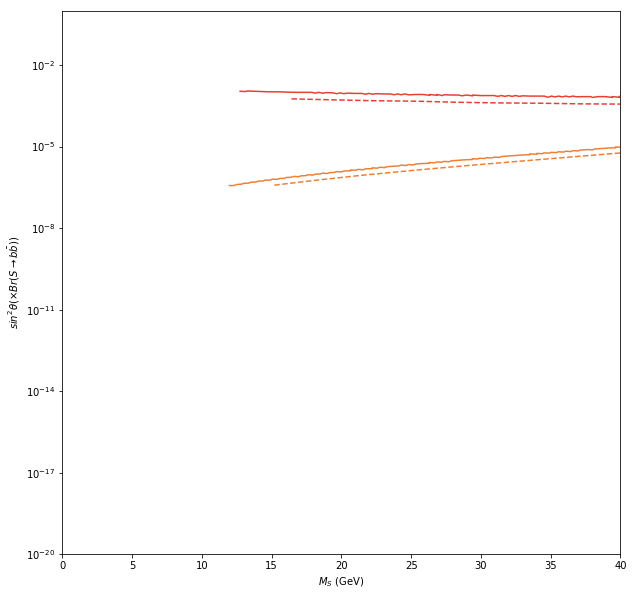

In [8]:
plt.plot(HFacZ3Const[:,0],HFacZ3Const[:,1], '--', color=RGBAtoRGBAtuple((233,63,51,1)))
plt.plot(HFacZ5Const[:,0],HFacZ5Const[:,1], color=RGBAtoRGBAtuple((233,63,51,1)))
plt.plot(ZFacZ3Const[:,0],ZFacZ3Const[:,1], '--', color=RGBAtoRGBAtuple((238,128,54,1)))
plt.plot(ZFacZ5Const[:,0],ZFacZ5Const[:,1], color=RGBAtoRGBAtuple((238,128,54,1)))

plt.xlabel(r'$M_S$ (GeV)')
plt.ylabel(r'$sin^2 \theta (\times Br (S \rightarrow b \bar{b}))$')
plt.yscale('log')
plt.ylim(1e-20, 1)
plt.xlim(0,40)
plt.show()

## Load and Plot Theory Benchmark Values

In [9]:
bm1 = pd.read_csv('MSsin2Theta/BM1MSSin2ThetaBR.dat', sep='\t')
bm2 = pd.read_csv('MSsin2Theta/BM2MSSin2ThetaBR.dat', sep='\t')
bm3 = pd.read_csv('MSsin2Theta/BM3MSSin2ThetaBR.dat', sep='\t')
bm4 = pd.read_csv('MSsin2Theta/BM4MSSin2ThetaBR.dat', sep='\t')
bm5 = pd.read_csv('MSsin2Theta/BM5MSSin2ThetaBR.dat', sep='\t')
bm6 = pd.read_csv('MSsin2Theta/BM6MSSin2ThetaBR.dat', sep='\t')


bm1s = bm1.values[bm1.values[:,0].argsort()]
bm2s = bm2.values[bm2.values[:,0].argsort()]
bm3s = bm3.values[bm3.values[:,0].argsort()]
bm4s = bm4.values[bm4.values[:,0].argsort()]
bm5s = bm5.values[bm5.values[:,0].argsort()]
bm6s = bm6.values[bm6.values[:,0].argsort()]

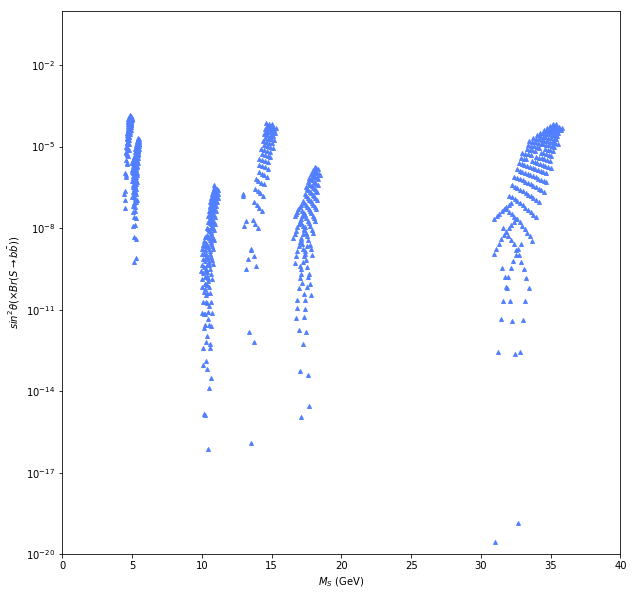

In [10]:
colorbm = RGBAtoRGBAtuple((81,127,255,1))
plt.scatter(bm1s[:,0], bm1s[:,1], s = 15, marker='^', color=colorbm)  #M_S ~ 32 GeV
plt.scatter(bm2s[:,0], bm2s[:,1], s = 15, marker='^', color=colorbm)  #M_S ~ 17 GeV
plt.scatter(bm3s[:,0], bm3s[:,1], s = 15, marker='^', color=colorbm)  #M_S ~ 14 GeV
plt.scatter(bm4s[:,0], bm4s[:,1], s = 15, marker='^', color=colorbm)  #M_S ~ 10 GeV
plt.scatter(bm5s[:,0], bm5s[:,1], s = 15, marker='^', color=colorbm)  #M_S ~  6 GeV
plt.scatter(bm6s[:,0], bm6s[:,1], s = 15, marker='^', color=colorbm)  #M_S ~  4 GeV


plt.xlabel(r'$M_S$ (GeV)')
plt.ylabel(r'$sin^2 \theta (\times Br (S \rightarrow b \bar{b}))$')
plt.yscale('log')
plt.ylim(1e-20, 1)
plt.xlim(0,40)
plt.show()

## Make Full Plot

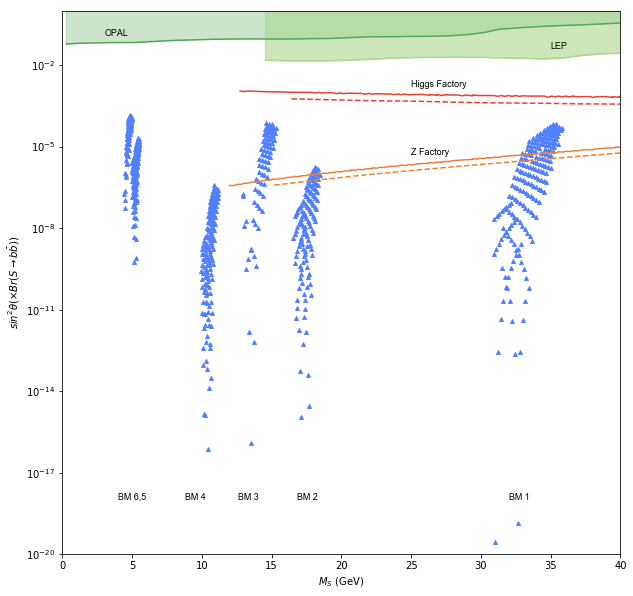

In [11]:
fontStr = 'Arial'
plt.plot(OPALConst[:,0], OPALConst[:,1], color=RGBAtoRGBAtuple((85,168,84,1)))    #'#') #55A854
plt.fill_between(OPALConst[:,0], OPALConst[:,1], y2=1,color=RGBAtoRGBAtuple((85,168,84,0.3))) 
plt.text(3, 0.12, 'OPAL',fontname=fontStr, fontsize=9)
plt.plot(LEPConst[:,0], LEPConst[:,1],color=RGBAtoRGBAtuple((172,215,140,1)))
plt.fill_between(LEPConst[:,0], LEPConst[:,1], y2=1, color=RGBAtoRGBAtuple((172,215,140,0.6)))
plt.text(35, 0.04, 'LEP',fontname=fontStr, fontsize=9)



plt.plot(HFacZ3Const[:,0],HFacZ3Const[:,1], '--', color=RGBAtoRGBAtuple((233,63,51,1)))
plt.plot(HFacZ5Const[:,0],HFacZ5Const[:,1], color=RGBAtoRGBAtuple((233,63,51,1)))
plt.text(25, 0.0015, 'Higgs Factory',fontname=fontStr, fontsize=9)
plt.plot(ZFacZ3Const[:,0],ZFacZ3Const[:,1], '--', color=RGBAtoRGBAtuple((238,128,54,1)))
plt.plot(ZFacZ5Const[:,0],ZFacZ5Const[:,1], color=RGBAtoRGBAtuple((238,128,54,1)))
plt.text(25, 0.000005, 'Z Factory',fontname=fontStr, fontsize=9)

colorbm = RGBAtoRGBAtuple((81,127,255,1))
plt.scatter(bm6s[:,0], bm6s[:,1], s = 15, marker='^', color=colorbm)
plt.scatter(bm4s[:,0], bm4s[:,1], s = 15, marker='^', color=colorbm)
plt.scatter(bm5s[:,0], bm5s[:,1], s = 15, marker='^', color=colorbm)
plt.scatter(bm3s[:,0], bm3s[:,1], s = 15, marker='^', color=colorbm)
plt.scatter(bm1s[:,0], bm1s[:,1], s = 15, marker='^', color=colorbm)
plt.scatter(bm2s[:,0], bm2s[:,1], s = 15, marker='^', color=colorbm)
plt.text(4, 1e-18, 'BM 6,5',fontname=fontStr, fontsize=9)
plt.text(8.8, 1e-18, 'BM 4',fontname=fontStr, fontsize=9)
plt.text(12.6, 1e-18, 'BM 3',fontname=fontStr, fontsize=9)
plt.text(16.8, 1e-18, 'BM 2',fontname=fontStr, fontsize=9)
plt.text(32, 1e-18, 'BM 1',fontname=fontStr, fontsize=9)

plt.xlabel(r'$M_S$ (GeV)')
plt.ylabel(r'$sin^2 \theta (\times Br (S \rightarrow b \bar{b}))$')
plt.yscale('log')
plt.ylim(1e-20, 1)
plt.xlim(0,40)
ax = plt.gca()
plt.savefig('MSTheta.png', dpi=300)
plt.show()

This plot shows the various benchmark values (blue triangles), exclusion limits from OPAL and LEP, and discovery potential of future Higgs and Z Factory experiments. Note that the dashed lines are for a 3 $\sigma$ significance and solid lines are for a 5 $\sigma$ significance. Also note that for benchmarks where $M_S$ is less than $2M_b$ the y-axis becomes $sin^2 \theta$, everywhere else the y-axis is $sin^2 \theta \times Br (S \rightarrow b \bar{b})$. 